In [1]:
#D208 Task 2

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns


#C2

# Load data
df = pd.read_csv('churn_clean.csv')


# Summary statistics for the dependent variable ('Churn')
dependent_variable = 'Churn'
dependent_summary = df[dependent_variable].describe()

# Summary statistics for independent variables
independent_variables = ['Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']
independent_summary = df[independent_variables].describe()

# Print summary statistics
print("Summary Statistics for Dependent Variable ('Churn'):\n")
print(dependent_summary)

print("\nSummary Statistics for Independent Variables:\n")
print(independent_summary)


Summary Statistics for Dependent Variable ('Churn'):

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

Summary Statistics for Independent Variables:

              Email      Contacts  Yearly_equip_failure        Tenure  \
count  10000.000000  10000.000000          10000.000000  10000.000000   
mean      12.016000      0.994200              0.398000     34.526188   
std        3.025898      0.988466              0.635953     26.443063   
min        1.000000      0.000000              0.000000      1.000259   
25%       10.000000      0.000000              0.000000      7.917694   
50%       12.000000      1.000000              0.000000     35.430507   
75%       14.000000      2.000000              1.000000     61.479795   
max       23.000000      7.000000              6.000000     71.999280   

       MonthlyCharge  
count   10000.000000  
mean      172.624816  
std        42.943094  
min        79.978860  
25%       139.979239  
50%       1

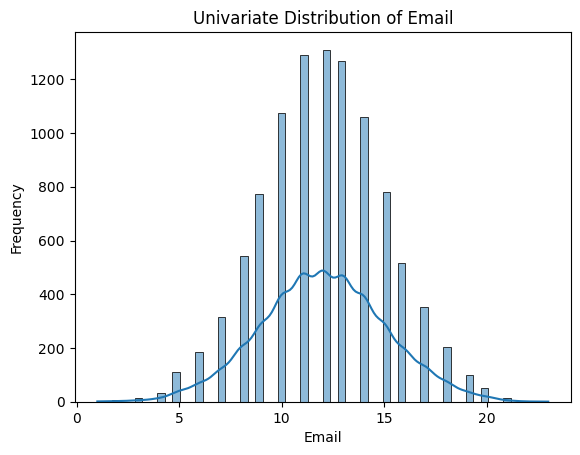

Summary of Email distribution:
count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64


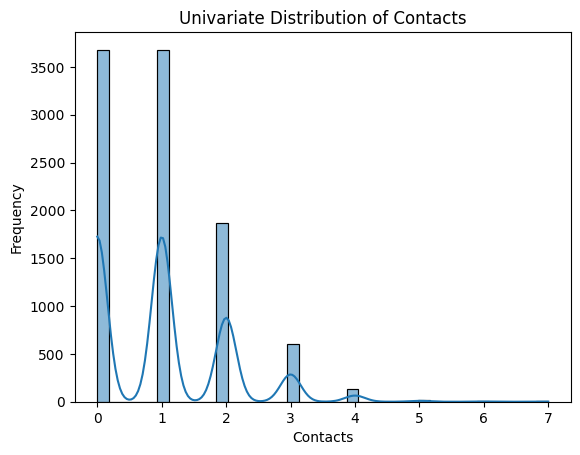

Summary of Contacts distribution:
count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64


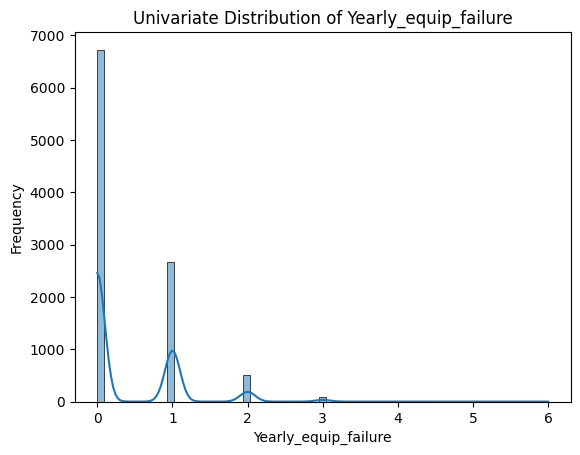

Summary of Yearly_equip_failure distribution:
count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64


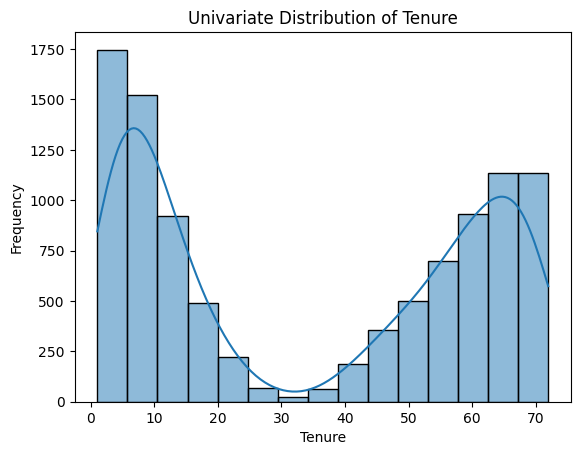

Summary of Tenure distribution:
count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


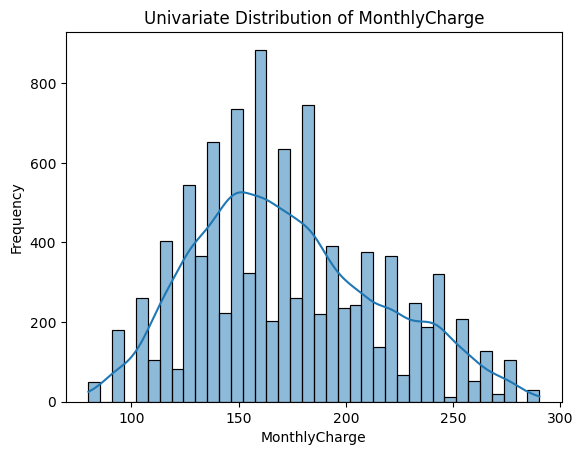

Summary of MonthlyCharge distribution:
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


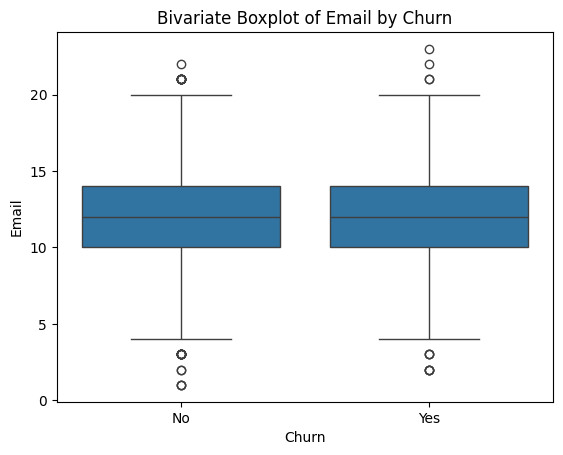

Summary of Email distribution by Churn:
        count       mean       std  min   25%   50%   75%   max
Churn                                                          
No     7350.0  11.993605  3.032026  1.0  10.0  12.0  14.0  22.0
Yes    2650.0  12.078113  3.008534  2.0  10.0  12.0  14.0  23.0


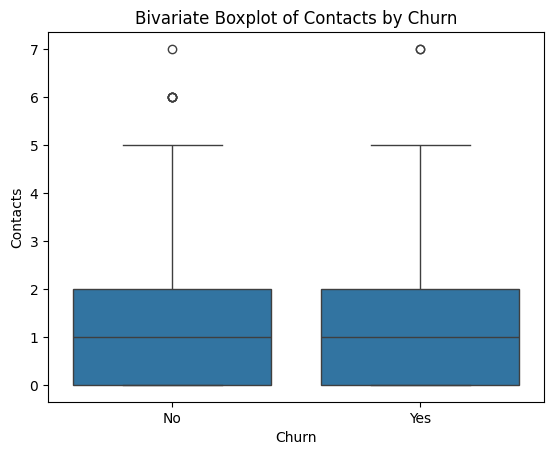

Summary of Contacts distribution by Churn:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     7350.0  0.989116  0.987962  0.0  0.0  1.0  2.0  7.0
Yes    2650.0  1.008302  0.989911  0.0  0.0  1.0  2.0  7.0


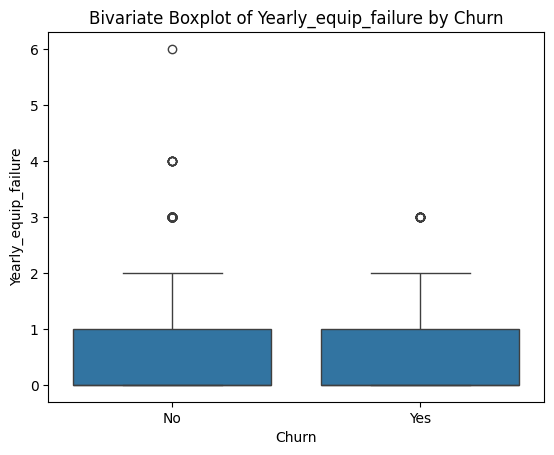

Summary of Yearly_equip_failure distribution by Churn:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     7350.0  0.404082  0.646108  0.0  0.0  0.0  1.0  6.0
Yes    2650.0  0.381132  0.606700  0.0  0.0  0.0  1.0  3.0


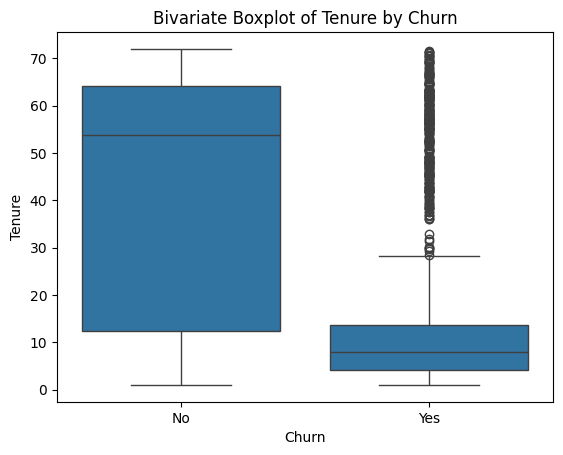

Summary of Tenure distribution by Churn:
        count       mean        std       min        25%        50%  \
Churn                                                                 
No     7350.0  42.234090  25.292018  1.005104  12.472424  53.774145   
Yes    2650.0  13.147667  15.577072  1.000259   4.073001   7.874490   

             75%       max  
Churn                       
No     64.226645  71.99928  
Yes    13.761794  71.64551  


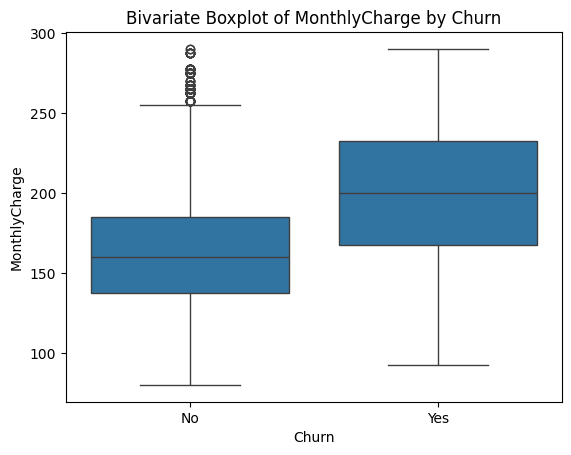

Summary of MonthlyCharge distribution by Churn:
        count        mean        std       min         25%       50%  \
Churn                                                                  
No     7350.0  163.008973  39.322148  79.97886  137.439154  159.9642   
Yes    2650.0  199.295175  41.268191  92.45514  167.484705  200.1185   

              75%         max  
Churn                          
No     184.978458  290.160400  
Yes    232.641455  290.160419  


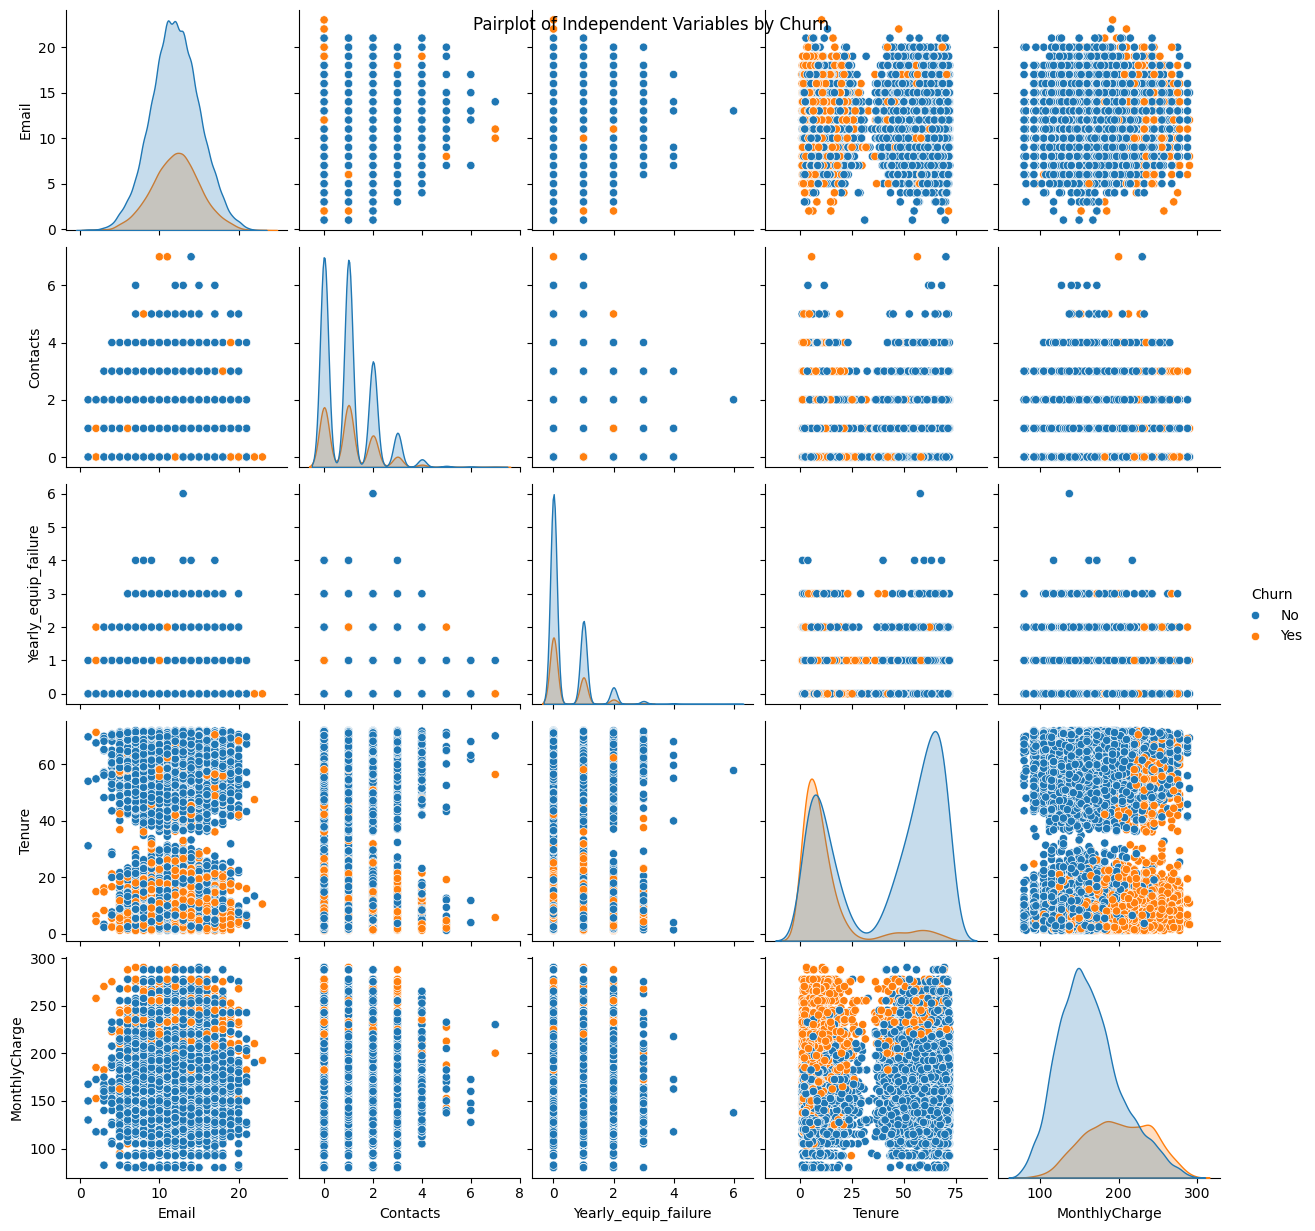

In [2]:
#C3

# Univariate visualizations for independent variables
for var in independent_variables:
    sns.histplot(df[var], kde=True)
    plt.title(f'Univariate Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Summary of {var} distribution:")
    print(df[var].describe())

# Bivariate visualizations for dependent variable
for var in independent_variables:
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'Bivariate Boxplot of {var} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()
    print(f"Summary of {var} distribution by Churn:")
    print(df.groupby('Churn')[var].describe())

# Additional bivariate visualization for numeric variables (Seaborn, n.d.)
sns.pairplot(df, vars=independent_variables, hue='Churn')
plt.suptitle('Pairplot of Independent Variables by Churn')
plt.show()


In [3]:
# Scaling numerical variables
from sklearn.preprocessing import StandardScaler

# Encoding Churn 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  

scaler = StandardScaler()
df[independent_variables] = scaler.fit_transform(df[independent_variables])

# Preparing data 

X = df.drop('Churn', axis=1)  # Independent variables
y = df['Churn']  # Dependent variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save new data
transformed_file_path = 'transformed_data2.csv'
df.to_csv(transformed_file_path, index=False)

# Print new data
print(df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [4]:
# D1

df2 = pd.read_csv('transformed_data2.csv')

# Adding constant term
df2['intercept'] = 1.0

# Set up the logistic regression model
logit_model = sm.Logit(df2['Churn'], df2[independent_variables + ['intercept']])

# Fit the model
logit_result = logit_model.fit()

# Print summary
print(logit_result.summary())



Optimization terminated successfully.
         Current function value: 0.342011
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.4085
Time:                        16:23:02   Log-Likelihood:                -3420.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Email                    0.0051      0.031      0.166      0.868      -0.055       0.065

In [5]:
# D2

# Selecting independent variables and adding intercept
X = df2[['Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']]
X = sm.add_constant(X)

# Dependent variable
y = df2['Churn']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)9
result = logit_model.fit()

# Elimination with a significance of 0.05 (Investigate, n.d.)
while True:
    max_p_value = result.pvalues.drop('const').max()  # Exclude intercept
    if max_p_value > 0.05:
        variable_to_remove = result.pvalues.idxmax()  # Get variable with highest p-value
        X = X.drop(variable_to_remove, axis=1)  # Drop the variable
        logit_model = sm.Logit(y, X)
        result = logit_model.fit()
    else:
        break

# Summary 
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.342011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342087
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.4084
Time:                        16:23:03   Log-Likelihood:                -3420.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust  

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Get predicted probabilities using the fitted model
X_with_const = sm.add_constant(X)
y_pred_prob = result.predict(X_with_const)

# Convert probabilities to binary predictions (0/1) based on a threshold (0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix (Javapoint, n.d.)
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy 
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[6738  612]
 [1050 1600]]
Accuracy: 0.8338
